#  Imports

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  

#  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)

In [3]:
# Count nulls
print(whale_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)

In [6]:
# Count nulls
print(algo_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)

In [9]:
# Check Data Types
print(sp500_df.dtypes)

Close    object
dtype: object


In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype(str)
sp500_df["Close"] = sp500_df["Close"].str.replace('$','')
sp500_df["Close"] = sp500_df["Close"].astype(float)

In [11]:
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df["Close"].pct_change()

In [13]:
# Drop nulls
print(sp500_df.isnull().sum())
sp500_df = sp500_df.dropna().copy()
print(sp500_df.isnull().sum())

Close    1
dtype: int64
Close    0
dtype: int64


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={"Close": "S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_returns.sort_index(inplace=True)

In [16]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

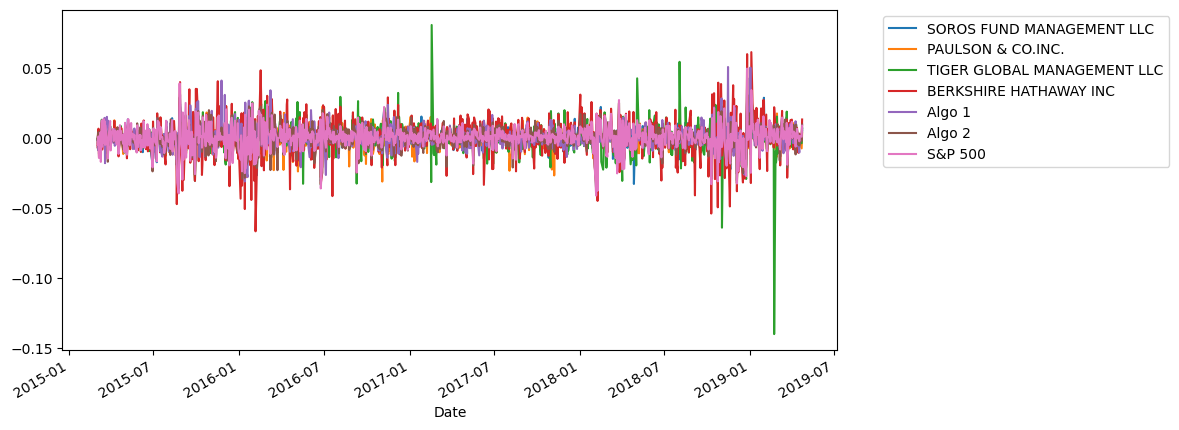

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10,5)).legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#### Calculate and Plot cumulative returns.

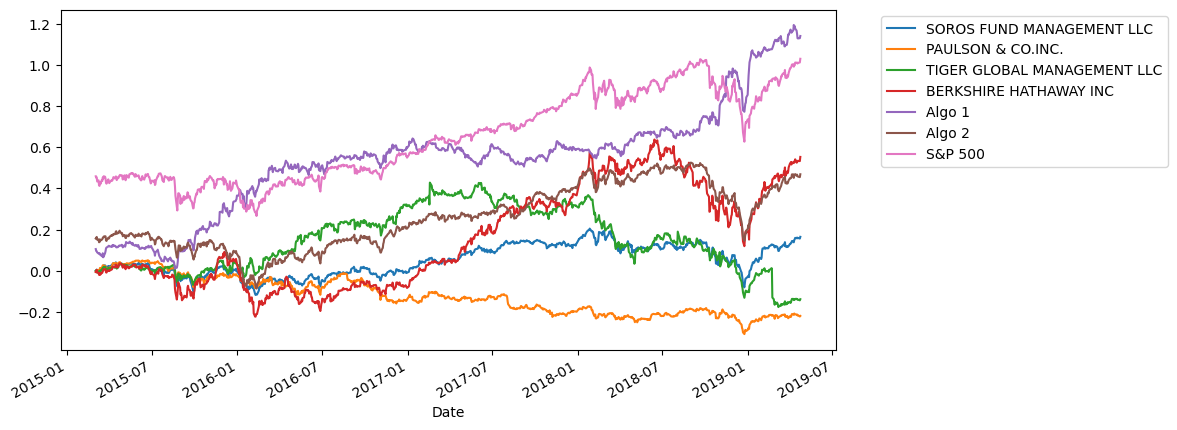

In [18]:
# Calculate cumulative returns of all portfolios
whale_df_cum = (1 + whale_df).cumprod() - 1
algo_df_cum = (1 + algo_df).cumprod() - 1
sp500_df_cum = (1 + sp500_df).cumprod() - 1

# Plot cumulative returns
combined_df_cum_returns = pd.concat([whale_df_cum, algo_df_cum, sp500_df_cum], axis="columns", join="inner")
combined_df_cum_returns.sort_index(inplace=True)
combined_df_cum_returns.plot(figsize=(10,5)).legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

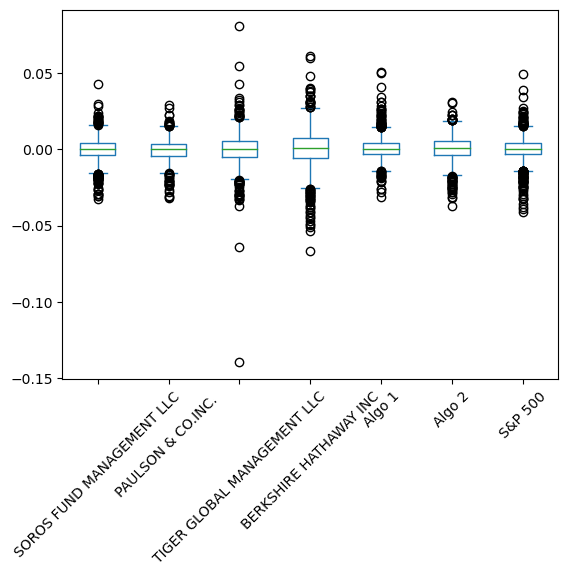

In [19]:
# Box plot to visually show risk
combined_returns.plot.box(rot=45)

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_std = combined_returns.std()
all_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
risky_portfolios = all_std.gt(sp500_std)
print(risky_portfolios[risky_portfolios==True])

TIGER GLOBAL MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC         True
dtype: bool


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

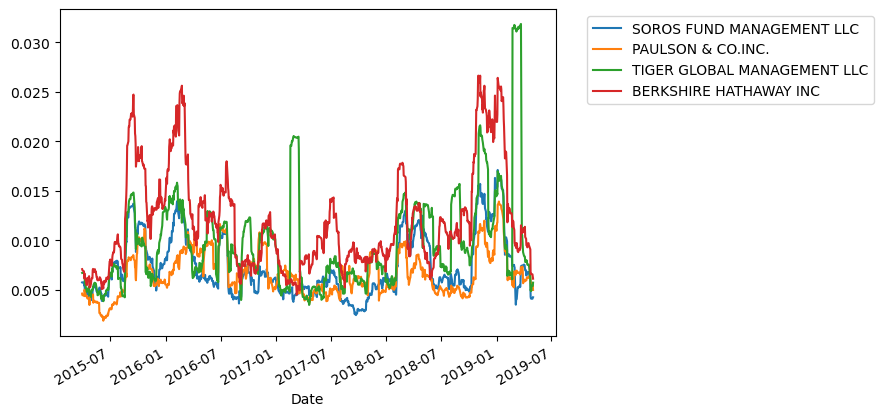

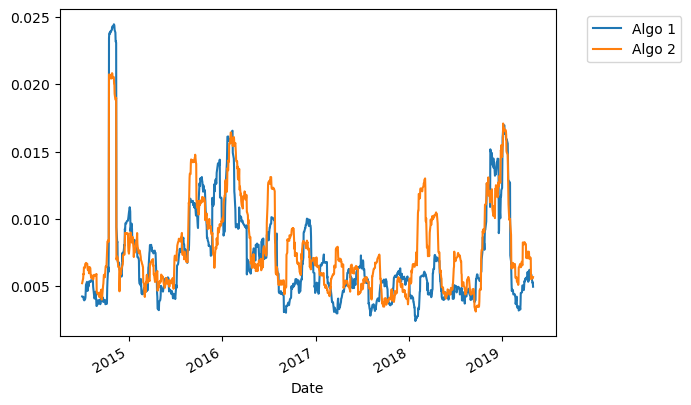

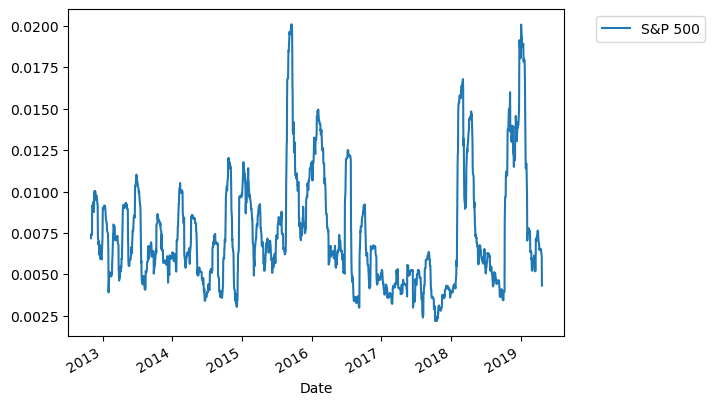

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window. Plot the rolling standard deviation
whale_df.rolling(window=21).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
algo_df.rolling(window=21).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
sp500_df.rolling(window=21).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Calculate and plot the correlation

<Axes: >

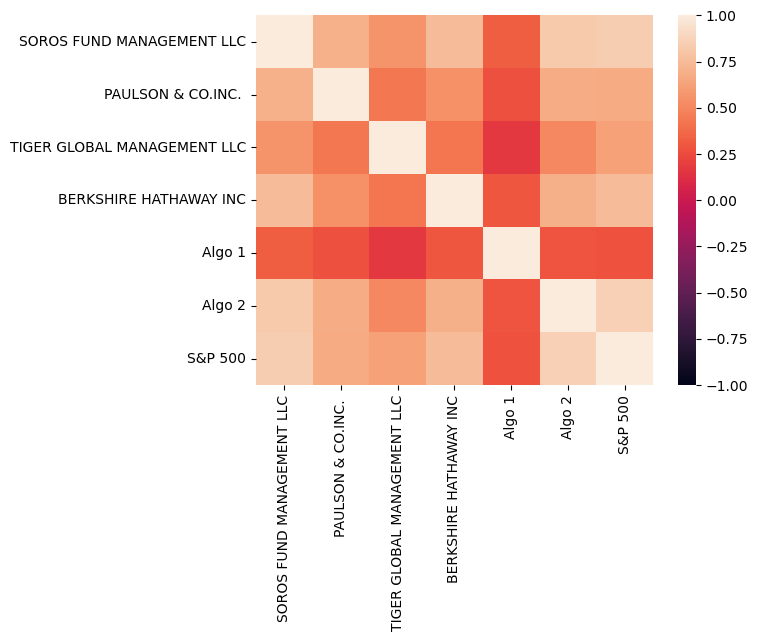

In [24]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

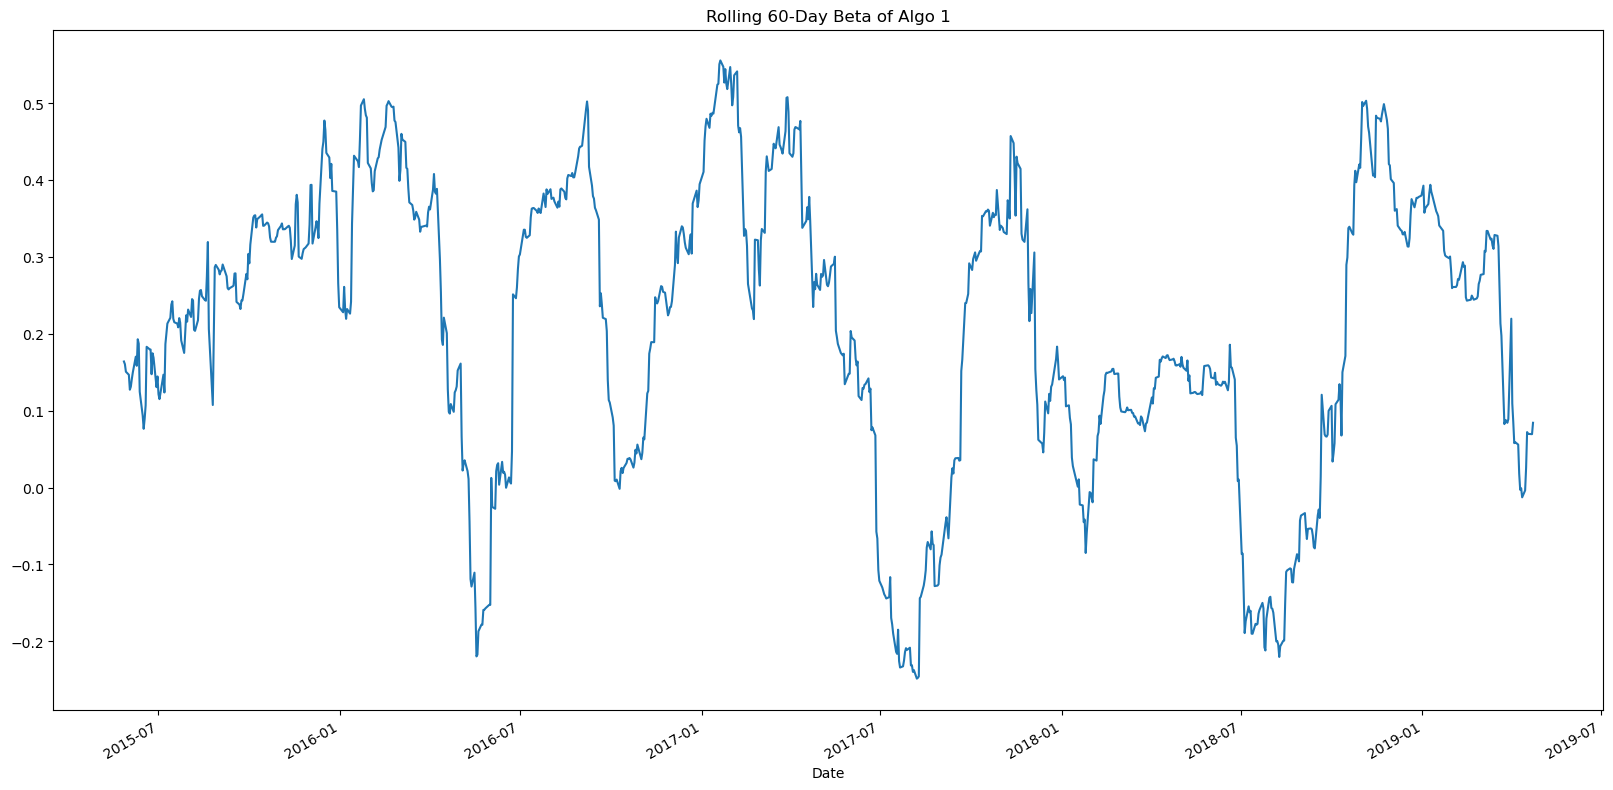

In [25]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P 500

# Calculate covariance of a single portfolio
rolling_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

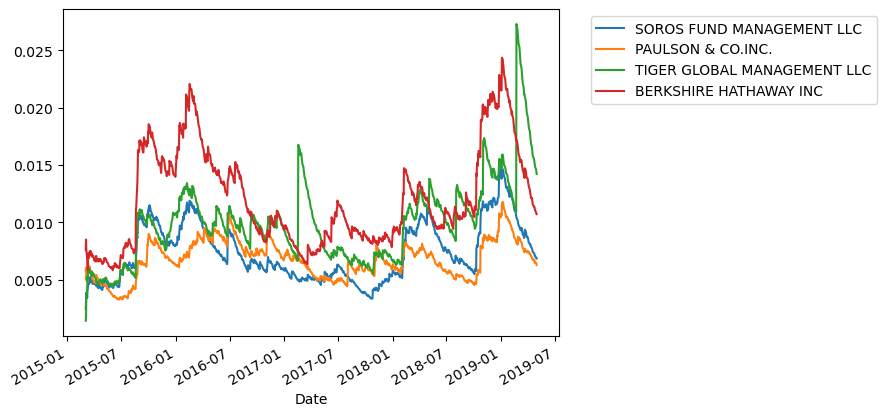

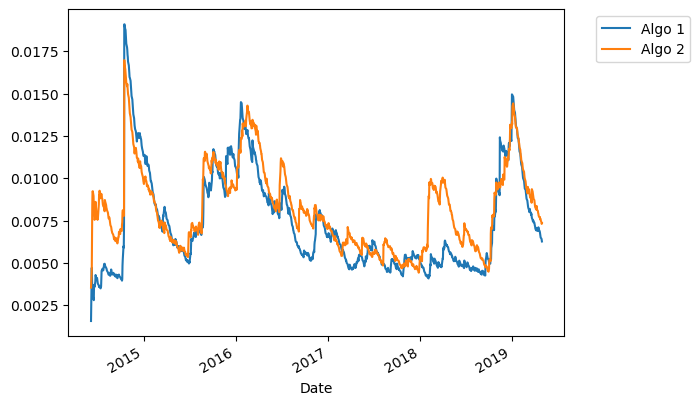

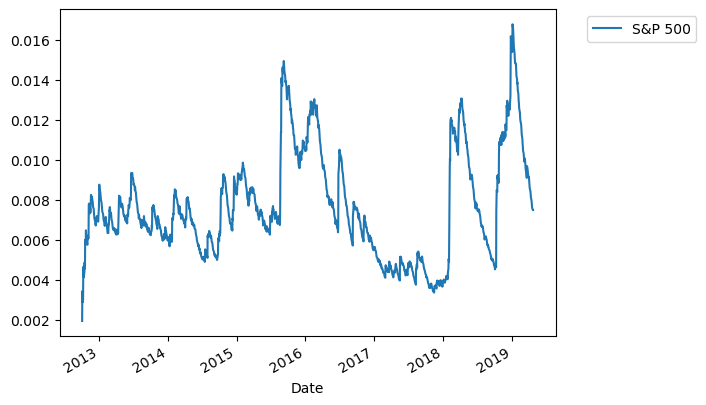

In [26]:
# Use `ewm` to calculate the rolling window
whale_df.ewm(halflife=21, adjust=False).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
algo_df.ewm(halflife=21, adjust=False).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
sp500_df.ewm(halflife=21, adjust=False).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<Axes: >

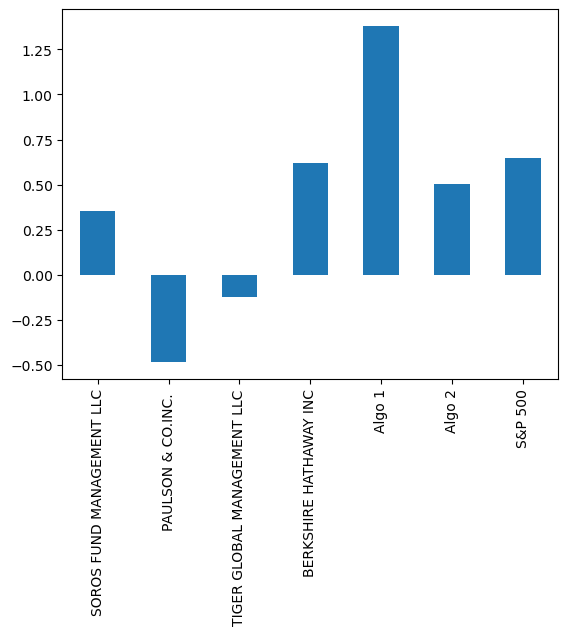

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [29]:
# Algo 1 outperformed both the market and whale portfolios while Algo 2 outperformed three whale porfolios (Soros, Paulson, and Tiger) but not Berkshire whale portfolio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from custom stock portfolio
faang_path = Path("Resources/faang.csv")
faang_df = pd.read_csv(faang_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [31]:
# Reset Date index
# Reorganize portfolio data by having a column per symbol
faang_df.index  = pd.to_datetime(faang_df.index)
faang_df.index = pd.to_datetime(faang_df.index.date)

In [32]:
# Calculate daily returns
faang_df_daily_returns = faang_df.pct_change()
faang_df_daily_returns.sort_index(inplace=True)

# Drop NAs
faang_df_daily_returns = faang_df_daily_returns.dropna().copy()

# Display sample data
faang_df_daily_returns.head()

,FB,AAPL,AMZN,NFLX,GOOG
2015-03-03,-0.001881,0.112487,-0.002593,-0.011514,0.003861
2015-03-04,0.016332,-0.006184,-0.004680,-0.010469,-0.000350
2015-03-05,0.003832,-0.016801,0.013062,-0.004470,0.003498
2015-03-06,-0.014777,0.001582,-0.020113,-0.029038,-0.013245
2015-03-09,-0.007124,0.004423,-0.003684,-0.018653,0.001766


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [.2, .2, .2, .2, .2]

# Calculate portfolio return
weighted_returns = faang_df_daily_returns.dot(weights)
weighted_returns = weighted_returns.to_frame()
weighted_returns.rename(columns={ weighted_returns.columns[0]: "FAANG" }, inplace = True)

# Display sample data
weighted_returns.head()

,FAANG
2015-03-03,0.020072
2015-03-04,-0.001070
2015-03-05,-0.000176
2015-03-06,-0.015118
2015-03-09,-0.004654


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_df = pd.concat([combined_returns,weighted_returns],axis=1, join='inner')

In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df = all_df.dropna().copy()

In [36]:
all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,FAANG
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.020072
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.001070
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.000176
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015118
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.004654


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
annualized_std_all_df = all_df.std() * np.sqrt(252)
annualized_std_all_df.sort_values(inplace=True)
annualized_std_all_df

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.135787
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
FAANG                          0.233272
dtype: float64

### Calculate and plot rolling `std` with 21-day window

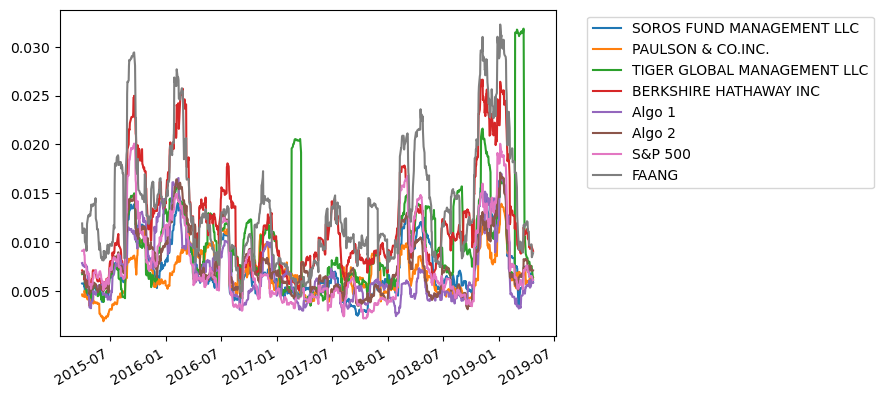

In [38]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
all_df.rolling(window=21).std().plot().legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Calculate and plot the correlation

<Axes: >

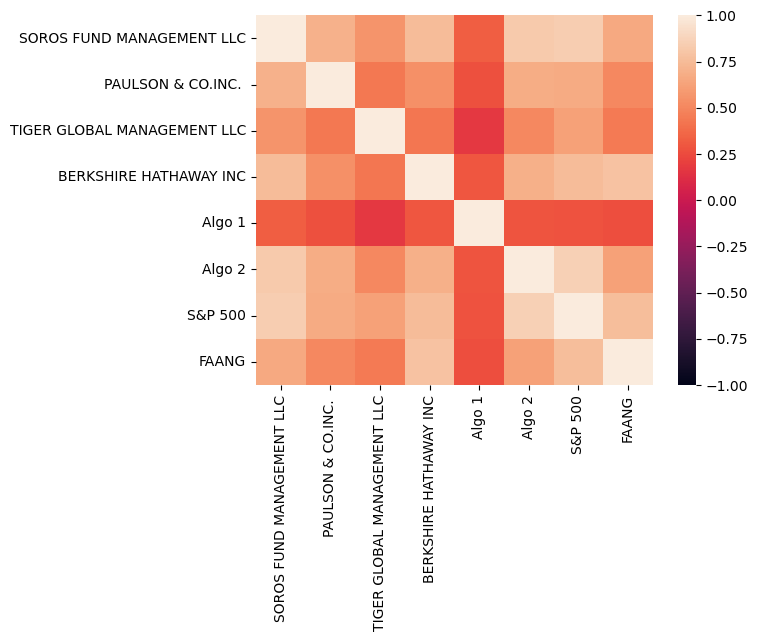

In [39]:
# Calculate and plot the correlation
all_df_correlation = all_df.corr()
sns.heatmap(all_df_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of FAANG to S&P 500'}, xlabel='Date'>

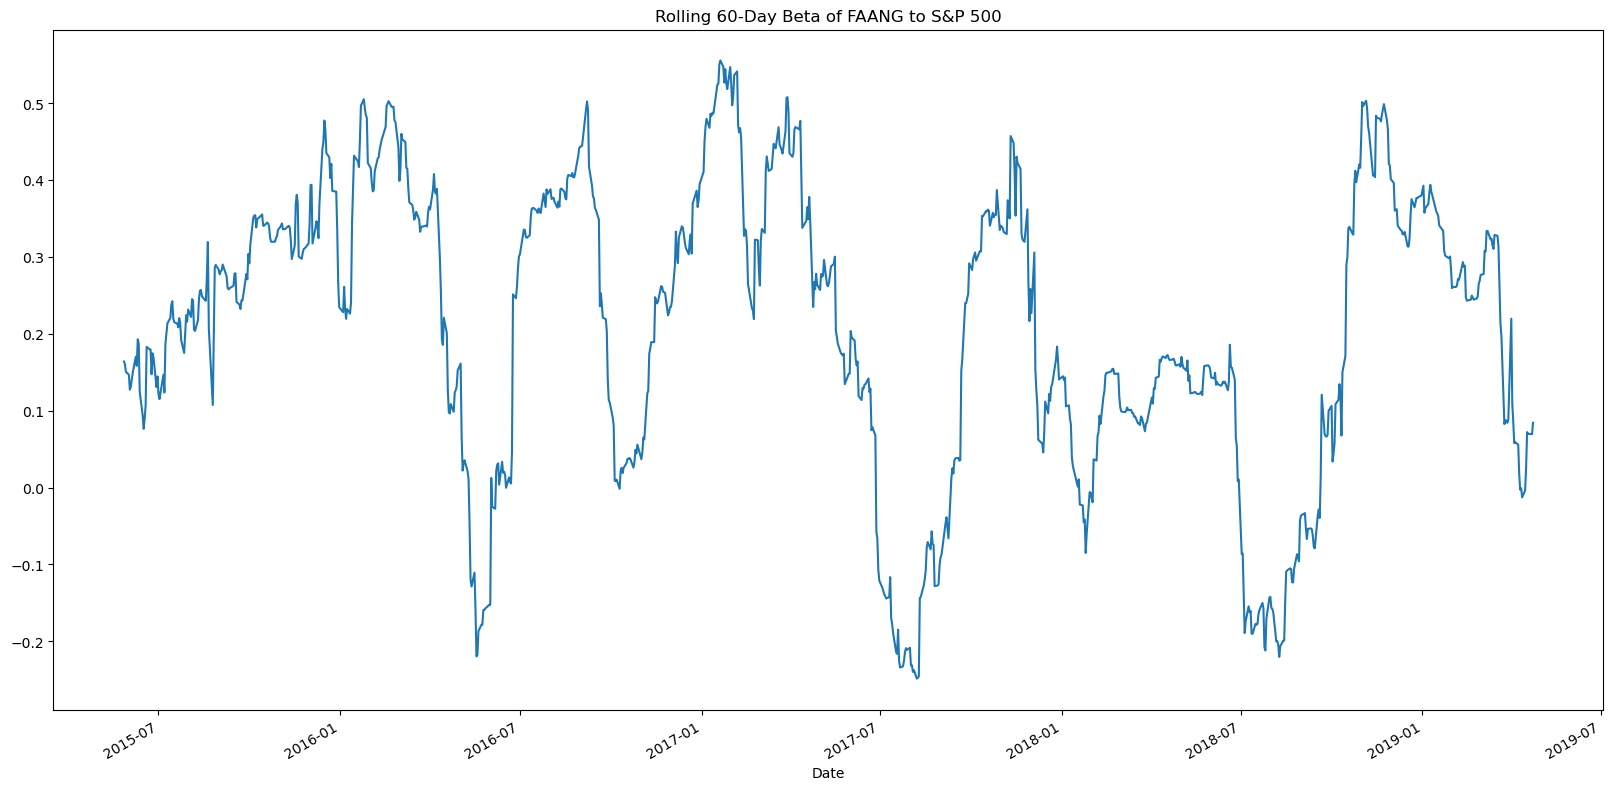

In [40]:
# Calculate 60-day rolling covariance of FAANG vs. S&P 500 and plot the data
covariance = all_df['FAANG'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()

# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of FAANG to S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_df.mean() * 252) / (all_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                        0.633139
FAANG                          1.335267
Algo 1                         1.369589
dtype: float64

<Axes: >

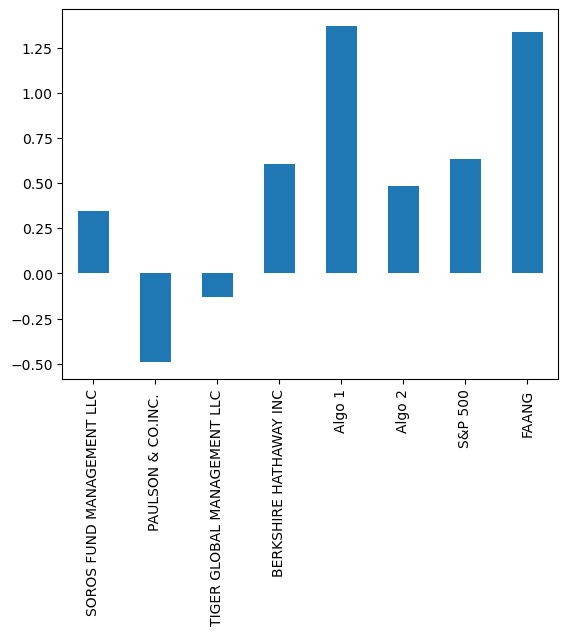

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [43]:
# My FAANG portfolio does very well with the second highest sharpe ratio, just below Algo 1